In [2]:
#import modules
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#load dataset
digits = datasets.load_digits()


In [3]:
#create data and label arrays
x = digits.data
y = digits.target

#split into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [4]:
training_array=[]
test_array=[]
for i in range(1, 8):
    kNN = KNeighborsClassifier(n_neighbors=i)
    kNN.fit(x_train, y_train)
    training_array.append(kNN.score(x_train, y_train))
    test_array.append(kNN.score(x_test, y_test))
    


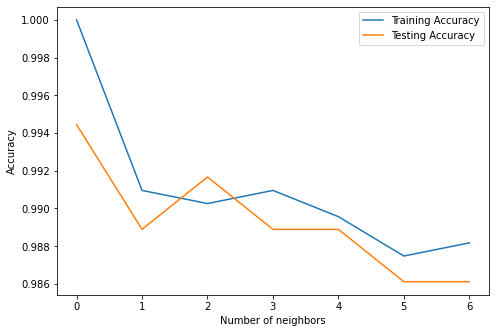

In [5]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(training_array, label="Training Accuracy")
ax.plot(test_array, label="Testing Accuracy")
ax.set_xlabel("Number of neighbors")
ax.set_ylabel("Accuracy")
ax.legend()
#conclusion: Testing accuracy is better becasue its improving gradually as compared to training which is declining. 

In [6]:
svm = SVC(kernel = 'linear')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.97      0.94      0.95        33
           2       1.00      1.00      1.00        28
           3       1.00      0.97      0.98        31
           4       0.97      1.00      0.98        31
           5       0.92      1.00      0.96        36
           6       1.00      0.98      0.99        42
           7       1.00      1.00      1.00        44
           8       0.92      0.94      0.93        35
           9       0.97      0.95      0.96        39

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.97       360
weighted avg       0.98      0.97      0.98       360



In [7]:
svm = SVC(kernel = 'rbf')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.97      1.00      0.99        33
           2       1.00      1.00      1.00        28
           3       1.00      0.97      0.98        31
           4       0.97      1.00      0.98        31
           5       0.97      1.00      0.99        36
           6       1.00      1.00      1.00        42
           7       1.00      1.00      1.00        44
           8       0.94      0.94      0.94        35
           9       0.97      0.95      0.96        39

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [8]:
svm = SVC(kernel = 'poly')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.97      1.00      0.99        33
           2       1.00      1.00      1.00        28
           3       1.00      0.97      0.98        31
           4       0.97      1.00      0.98        31
           5       0.97      1.00      0.99        36
           6       1.00      1.00      1.00        42
           7       1.00      1.00      1.00        44
           8       0.97      0.97      0.97        35
           9       1.00      0.97      0.99        39

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [9]:
# Conclusion: In this case linear or poly kernel should be used for better results.

In [10]:
array=[]
bayes = GaussianNB()
bayes.fit(x_train, y_train)
y_pred = bayes.predict(x_test)
array = confusion_matrix(y_test, y_pred)

print(array)

[[39  0  0  0  1  1  0  0  0  0]
 [ 0 26  0  0  0  0  0  2  4  1]
 [ 0  2 23  0  0  0  0  0  3  0]
 [ 0  0  1 24  0  0  0  0  6  0]
 [ 0  0  0  0 26  0  0  5  0  0]
 [ 0  0  0  0  0 34  0  1  1  0]
 [ 0  0  0  0  1  1 40  0  0  0]
 [ 0  0  0  0  0  1  0 43  0  0]
 [ 0  3  0  0  0  1  0  2 29  0]
 [ 1  2  0  2  0  1  0  3  3 27]]


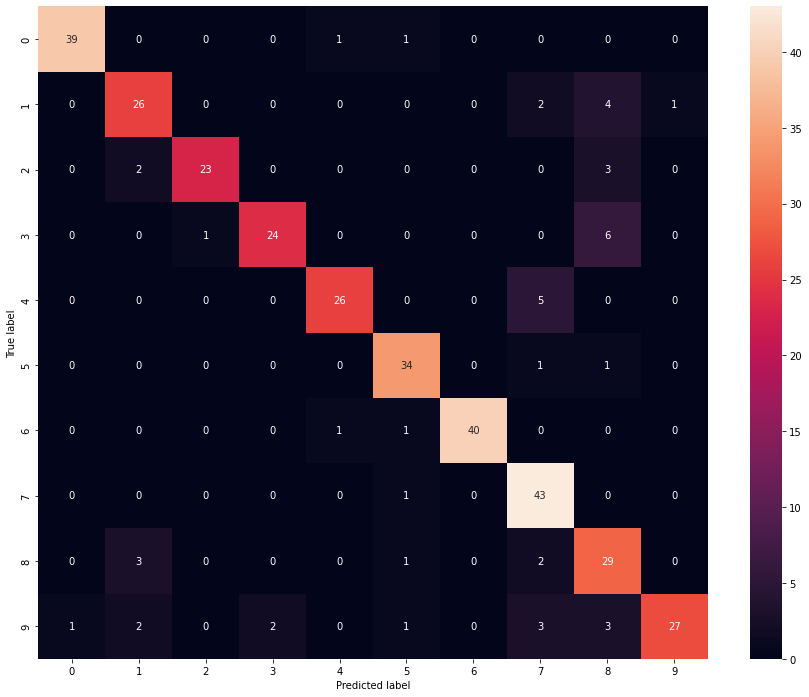

In [11]:
DetaFrame_cm = pd.DataFrame(array, range(10), range(10))
f, ax = plt.subplots(figsize=(15, 12)) 
sns.heatmap(DetaFrame_cm, annot=True)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

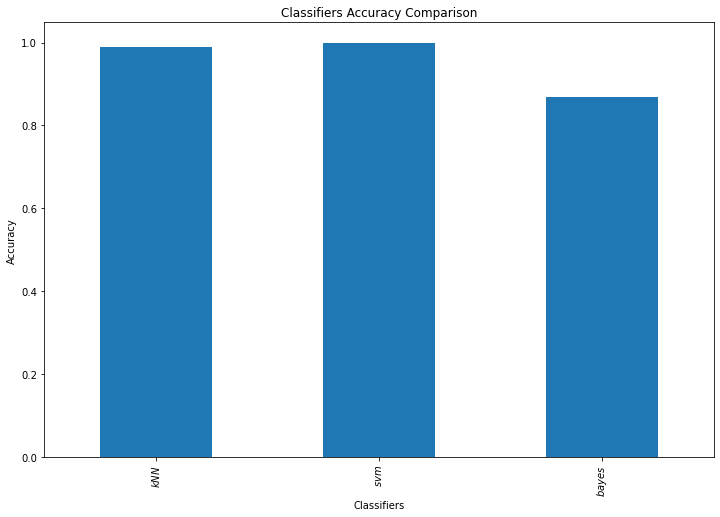

In [12]:
bar_plot=[]

bar_plot.append(kNN.score(x_train, y_train))
bar_plot.append(svm.score(x_train, y_train))
bar_plot.append(bayes.score(x_train, y_train))

compare = pd.Series(bar_plot)
compare

plt.figure(figsize=(12, 8))
ax = compare.plot(kind='bar')
ax.set_title('Classifiers Accuracy Comparison')
ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy')
ax.set_xticklabels(('$kNN$', '$svm$', '$bayes$'))
plt.show()

In [13]:
df = pd.read_csv('gapminder.csv')
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


                 population  fertility       HIV       CO2  BMI_male  \
population         1.000000  -0.061345 -0.065821 -0.010147 -0.134905   
fertility         -0.061345   1.000000  0.292695 -0.439747 -0.715380   
HIV               -0.065821   0.292695  1.000000 -0.165889 -0.308700   
CO2               -0.010147  -0.439747 -0.165889  1.000000  0.581031   
BMI_male          -0.134905  -0.715380 -0.308700  0.581031  1.000000   
GDP               -0.045687  -0.502615 -0.208410  0.823099  0.625126   
BMI_female        -0.135149   0.527314  0.396680 -0.280813 -0.447049   
life              -0.005051  -0.786921 -0.604749  0.476666  0.731559   
child_mortality    0.008058   0.901704  0.394913 -0.458186 -0.749691   

                      GDP  BMI_female      life  child_mortality  
population      -0.045687   -0.135149 -0.005051         0.008058  
fertility       -0.502615    0.527314 -0.786921         0.901704  
HIV             -0.208410    0.396680 -0.604749         0.394913  
CO2        

<AxesSubplot:>

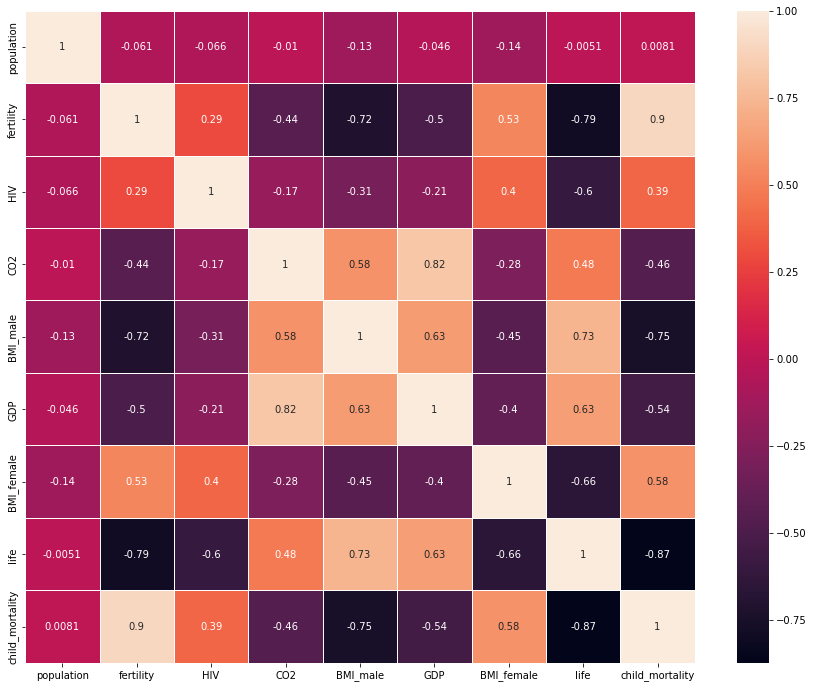

In [14]:
correlation = df.corr()
print(correlation)
f, ax = plt.subplots(figsize=(15, 12)) 
sns.heatmap(correlation, linewidths=.5, annot=True)

In [15]:
x = df['fertility']
y = df['life']

regression = LinearRegression()
regression.fit(x[:, None], y)
print(regression.score(x[:, None], y))
cross_val_score(regression, x[:, None], y, cv=5)

0.6192442167740035


C:\Users\amic7\AppData\Local\Temp/ipykernel_35388/2517802833.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  regression.fit(x[:, None], y)
C:\Users\amic7\AppData\Local\Temp/ipykernel_35388/2517802833.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print(regression.score(x[:, None], y))
C:\Users\amic7\AppData\Local\Temp/ipykernel_35388/2517802833.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cross_val_score(regression, x[:, None], y, cv=5)


array([0.71001079, 0.75007717, 0.55271526, 0.547501  , 0.52410561])

C:\Users\amic7\AppData\Local\Temp/ipykernel_35388/1880531586.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  fig, ax = plt.plot(x, y, 'bo', x, regression.predict(x[:, None]), '-k')


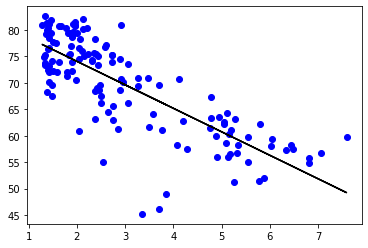

In [16]:
fig, ax = plt.plot(x, y, 'bo', x, regression.predict(x[:, None]), '-k')

In [17]:
x = df[['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP', 'BMI_female', 'child_mortality']]
y = df['life']

regression = LinearRegression()
regression.fit(x, y)
y_pred = regression.score(x, y)
print(y_pred)
cross_val_score(regression, x, y, cv=5)

0.8978171883856773


array([0.81720569, 0.82917058, 0.90214134, 0.80633989, 0.94495637])

In [18]:
# Model score with all features = 0.8978 and model score with one feature = 0.6192
# cross validation score - regression = 0.71001079, 0.75007717, 0.55271526, 0.547501  , 0.52410561
# cross validation scor - regression all = 0.81720569, 0.82917058, 0.90214134, 0.80633989, 0.94495637

In [19]:
df = pd.read_csv('creditcard.csv')
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


492 frauds,  284315 non-frauds


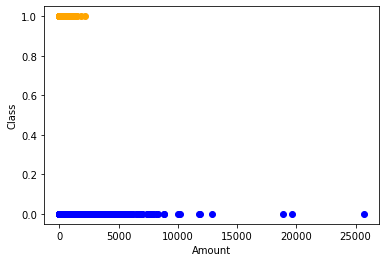

In [20]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(frauds), 'frauds, ', len(non_frauds), 'non-frauds')
plt.plot(frauds.Amount, frauds.Class, 'o', color='orange', label='Frauds')
plt.plot(non_frauds.Amount, non_frauds.Class, 'o', color='blue', label='Non-Frauds')
plt.xlabel('Amount')
plt.ylabel('Class')
plt.show()
#conclusion: non-fraud transaction are way more higher than fraud transactions.

[[284156    159]
 [   151    341]]


C:\Users\amic7\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

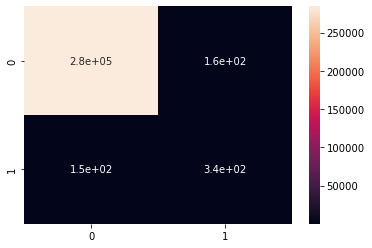

In [21]:
#Logistic regression
x = df.drop('Class', axis=1)
y = df.Class

log_regression = LogisticRegression()
log_regression.fit(x, y)
y_pred = log_regression.predict(x)
conf_matrix = confusion_matrix(y, y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True)